<a href="https://colab.research.google.com/github/asdevika2001/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

In [63]:
train_df=pd.read_csv('/content/fraudTrain.csv')
test_df=pd.read_csv('/content/fraudTest.csv')

In [64]:
df = pd.concat([train_df, test_df], ignore_index=True)

**EDA**

In [65]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [66]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1601680,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519.0,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1.388534e+09,39.946837,-91.333331,0.0
1601681,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739.0,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1.388534e+09,29.661049,-96.186633,0.0
1601682,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684.0,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1.388534e+09,46.658340,-119.715054,0.0
1601683,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129.0,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1.388534e+09,44.470525,-117.080888,0.0
1601684,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001.0,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1.388534e+09,36.210097,-97.036372,0.0


In [67]:
df.shape

(1601685, 23)

In [68]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601685 entries, 0 to 1601684
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1601685 non-null  int64  
 1   trans_date_trans_time  1601685 non-null  object 
 2   cc_num                 1601685 non-null  int64  
 3   merchant               1601685 non-null  object 
 4   category               1601685 non-null  object 
 5   amt                    1601685 non-null  float64
 6   first                  1601685 non-null  object 
 7   last                   1601685 non-null  object 
 8   gender                 1601685 non-null  object 
 9   street                 1601685 non-null  object 
 10  city                   1601685 non-null  object 
 11  state                  1601685 non-null  object 
 12  zip                    1601685 non-null  int64  
 13  lat                    1601684 non-null  float64
 14  long              

In [70]:
is_fraud = df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  8138
No:  1593546


In [71]:
#Here the data is unbalanced
print(df.isna().sum())
print(df.duplicated().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64
0


In [72]:
df.dropna(axis=0, inplace=True)

In [73]:
print(df.isna().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


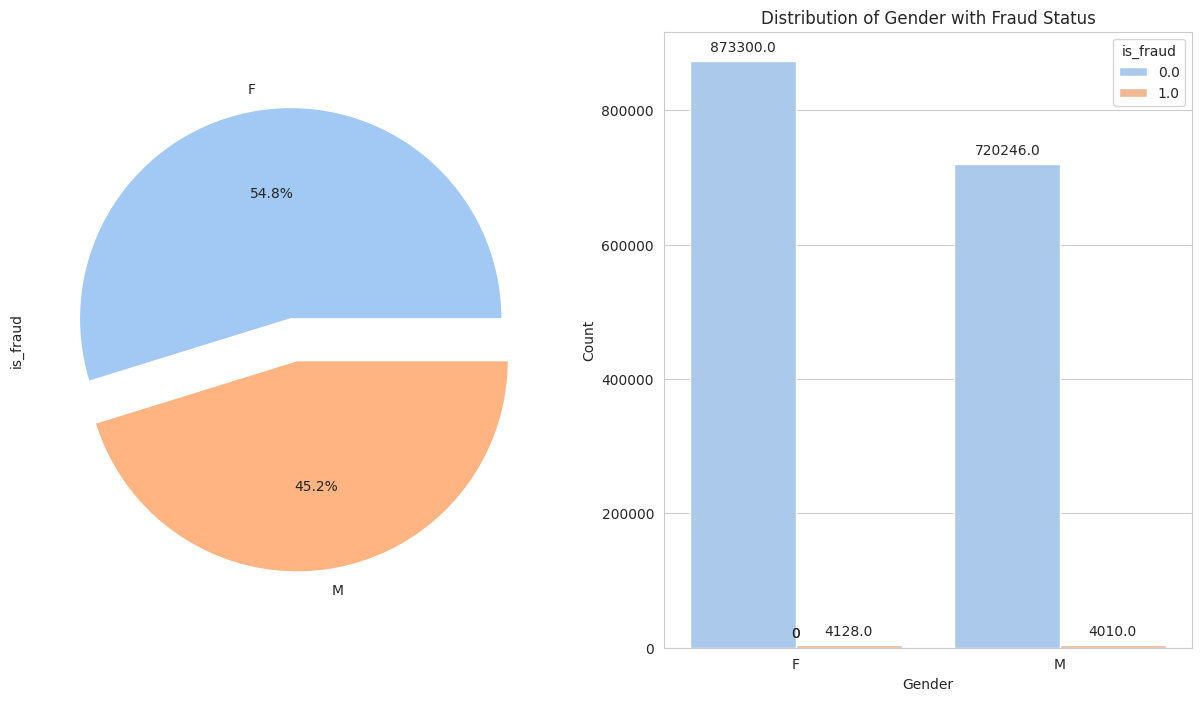

In [74]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
df.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

In [75]:
#Females are doing more transactions but males are more likely to make fraud transaction

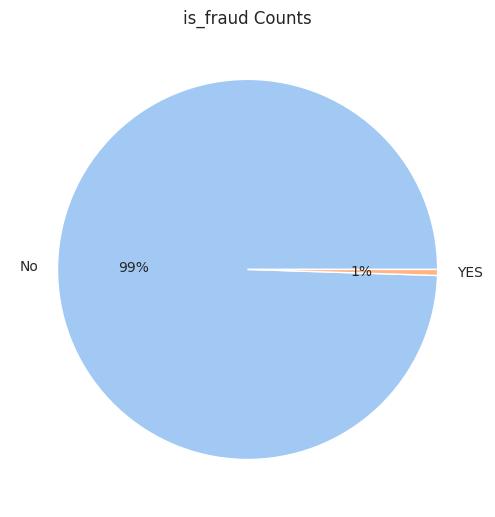

In [76]:
is_fraud = df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [77]:
#99% is not fraud and only 1% is fraud leads to imbalanced data

Feature Engineering

In [78]:
# Convert 'trans_date_trans_time' column to datetime type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

In [79]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['hour'] = df['trans_date_trans_time'].dt.hour

df['month'] = df['trans_date_trans_time'].dt.month
df['month'] = df['trans_date_trans_time'].dt.month

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,0,1


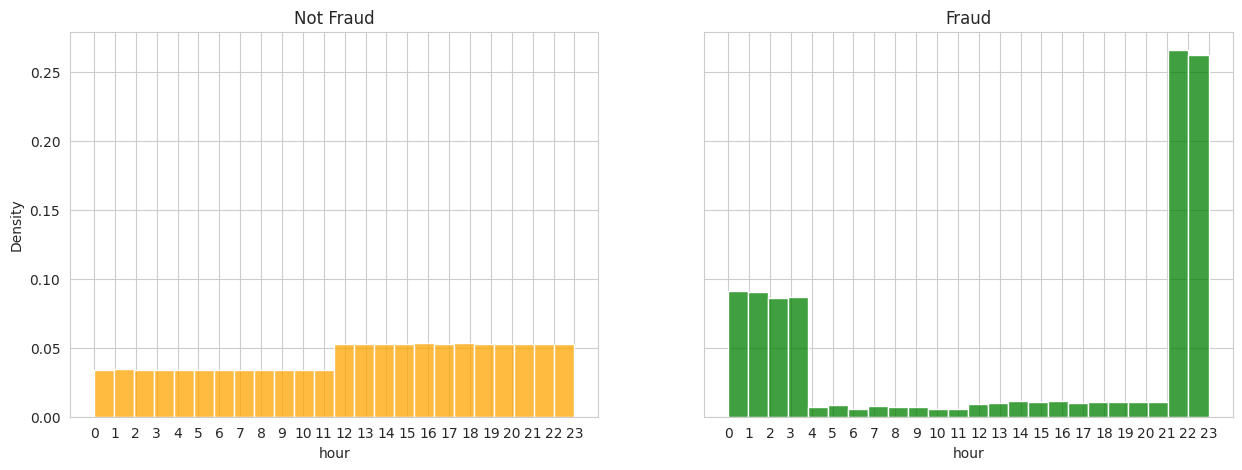

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=df[df["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1, color="orange")

ax2 = sns.histplot(x='hour', data=df[df["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="green")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24)) # ticks of the day 0 -> 23
ax2.set_xticks(np.arange(24));

In [81]:
#It is clear that fraud transactions mainly occur at midnight. last 2 hours of the day

In [82]:
unique_transaction_count = len(df['trans_num'].unique())
print("Total count of unique transaction numbers:", unique_transaction_count)
#concluding that each transaction has it's own number

Total count of unique transaction numbers: 1601684


In [83]:
# remove non-useful columns
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
df = df.drop(columns_to_drop, axis=1)
df.head()

,Unnamed: 0,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",36.011293,-82.048315,0.0,0,1
1,1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149.0,Special educational needs teacher,49.159047,-118.186462,0.0,0,1
2,2,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,42.1808,-112.2620,4154.0,Nature conservation officer,43.150704,-112.154481,0.0,0,1
3,3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,46.2306,-112.1138,1939.0,Patent attorney,47.034331,-112.561071,0.0,0,1
4,4,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,38.674999,-78.632459,0.0,0,1


In [84]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601684 entries, 0 to 1601684
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1601684 non-null  int64  
 1   merchant    1601684 non-null  object 
 2   category    1601684 non-null  object 
 3   amt         1601684 non-null  float64
 4   last        1601684 non-null  object 
 5   gender      1601684 non-null  object 
 6   lat         1601684 non-null  float64
 7   long        1601684 non-null  float64
 8   city_pop    1601684 non-null  float64
 9   job         1601684 non-null  object 
 10  merch_lat   1601684 non-null  float64
 11  merch_long  1601684 non-null  float64
 12  is_fraud    1601684 non-null  float64
 13  hour        1601684 non-null  int64  
 14  month       1601684 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 195.5+ MB


In [86]:
# applying label encoding
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

In [87]:
!pip install category_encoders

In [88]:
from category_encoders import WOEEncoder

In [89]:
# applying WOE encoding
for col in ['job','merchant', 'category', 'lat', 'last']:
    df[col] = WOEEncoder().fit_transform(df[col],df['is_fraud'])

In [90]:
df.head()

,Unnamed: 0,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0,1.131151,0.936287,4.97,-0.078872,0,36.0788,-81.1781,3495.0,-0.233360,36.011293,-82.048315,0.0,0,1
1,1,0.737297,0.894023,107.23,-0.195605,0,48.8878,-118.2105,149.0,-0.523758,49.159047,-118.186462,0.0,0,1
2,2,-0.653104,-0.880397,220.11,0.068923,1,42.1808,-112.2620,4154.0,1.039606,43.150704,-112.154481,0.0,0,1
3,3,-0.489516,-0.237533,45.00,0.483064,1,46.2306,-112.1138,1939.0,0.269472,47.034331,-112.561071,0.0,0,1
4,4,-0.357862,-0.635126,41.96,0.392102,1,38.4207,-79.4629,99.0,0.078036,38.674999,-78.632459,0.0,0,1


In [92]:
#as our data is imbalanced we will use Resampling Techniques
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
No_class = df[df["is_fraud"]==0]
yes_class = df[df["is_fraud"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)


X = down_samples.drop("is_fraud", axis=1)
y = down_samples["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

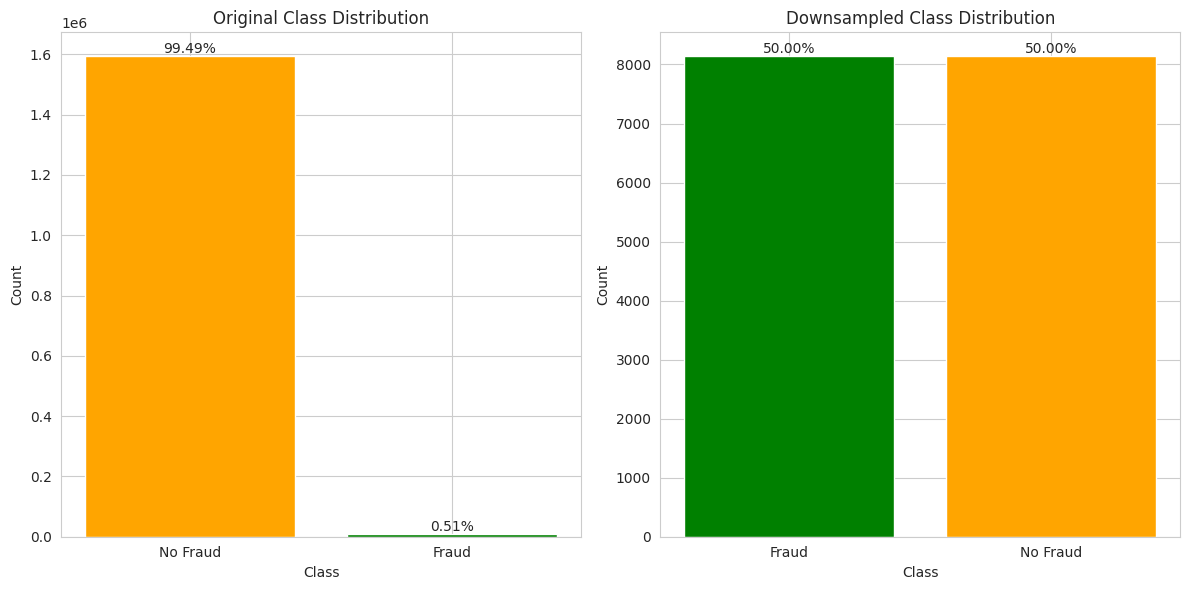

In [94]:
# Count the occurrences of each class in the original dataset
original_class_counts = df["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["is_fraud"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# Plotting
plt.figure(figsize=(12, 6))
# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

Machine Learning model training

In [95]:
#Logistic Regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      1634
         1.0       0.90      0.77      0.83      1622

    accuracy                           0.84      3256
   macro avg       0.85      0.84      0.84      3256
weighted avg       0.85      0.84      0.84      3256

Logistic Regression accuracy is: 84.21%


In [96]:
#Decision Tree
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      1634
         1.0       0.96      0.74      0.83      1622

    accuracy                           0.85      3256
   macro avg       0.87      0.85      0.85      3256
weighted avg       0.87      0.85      0.85      3256

ID3 model accuracy is: 85.26%


In [97]:
#Random Forest
# Initialize and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1634
         1.0       0.96      0.96      0.96      1622

    accuracy                           0.96      3256
   macro avg       0.96      0.96      0.96      3256
weighted avg       0.96      0.96      0.96      3256

Random Forest model accuracy is: 96.16%


In [98]:
Algorithms = [ 'RandomForest', 'ID3', 'Logistic Regression']
accuracy = [RF_accuracy, ID3_accuracy, LR_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,RandomForest,0.961609
1,ID3,0.852580
2,Logistic Regression,0.842138


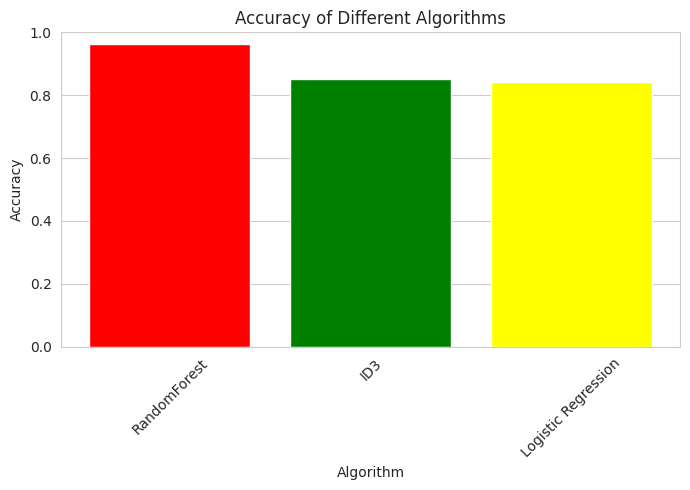

In [100]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=['red','green','yellow'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()